# 2 Etude et résolution numérique

1. Le problème étudié est le suivant : 
$$ {min}_{P, T^{i}} \Delta \sum_{k=1}^N{c}_k P_k $$
s.c.
$$ 0 \leq P_k \leq P_{max,k} - \forall k $$ 
$$  T^{i}_{min,k} \leq T^{i}_k \leq T^{i}_{max,k} - \forall k$$
$$ T_{k+1}^{i} = f_{k}(T_{k}^{i},p,P) - \forall k$$

Avec $$f(T_k^i, p) = T^i_k + \dfrac{p_1 \,\Delta }{c_{air}} (p_2 (T^e_k - T^i_k) + p_3 \Phi_s^k + \nu P_k)$$

On voit la qu'il s'agit d'un problème convexe, toutes les fonctions du problème sont linéraires et donc convexe. La convexité et l'aspect borné des solutions permet d'affirmer, à l'aide des théorèmes du cours, l'existence d'une solution à ce problème. On peut cependant pas prouver l'unicité de cette solution. Il y a donc au moins une solution au problème de minimisation posé. Comme dit précédemment, il s'agit là d'un problème d'optimisation linéaire de la forme :

$$ {min}_{X} <V.X> $$
s.c.
$$ AX = B $$
$$  X\geq 0$$

Aucun algorithme vu dans le cours ne permet de résoudre des problèmes d'optimisation linéaire. Cependant, nous avons vu en TD la méthode du "simplex" qui permet de résoudre ce genre de problème. Il suffit pour cela de réexprimer les diférentes contraintes d'une autre facon en ajoutant des variables d'écart.




Ainsi on transforme les différentes inégalités en :
$$T^{i}_{min,k} - T^{i}_{k} + \alpha_k = 0-\forall k$$
$$ T^{i}_{k} -T^{i}_{max,k} + \beta_k = 0-\forall k$$
$$P_k -P_{max,k} + \gamma_k=0-\forall k$$
Soit,  $$  \alpha,\beta,\gamma \geq 0$$

In [1]:
from math import *
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

144
144
144
144
0.5


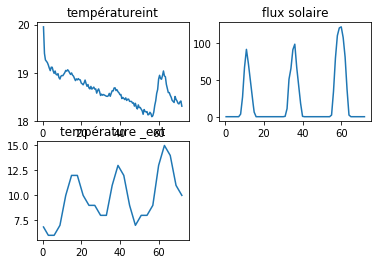

In [12]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')
print(len(T_int))
print(len(T_ext))
print(len(phi_sol))
print(len(heure))
print(heure[2]-heure[1])

In [55]:
import pdb

prix_watt = 2.0
n=143
p1 = 0.057473
p2 = 0.022
p3 = 0.006433
nu = 0.7
delta = 0.5
c_air = 1.256
temp_min = 19+273
temp_max = 21+273
puissance_max = 1000
a1 = (delta*p1)/c_air
C = np.zeros(2*(n+1))
Te = np.zeros(n+1)
Timin = np.full(n+1,temp_min)
Timax = np.full(n+1,temp_max)
Pmax = np.full(n+1,puissance_max)
Fluxsolaire = np.zeros(n+1)
Temp_ext = np.zeros(n+1)
boundmin = np.zeros(2*n+2)
boundmax = np.zeros(2*n+2)
bounds = []
for i in range(n+1):
    boundmin[n+1+i] = Timin[i]
    boundmax[i] = Pmax[i]
    boundmax[n+1+i] = Timax[i]
for i in range(len(boundmax)):
    bounds.append((boundmin[i],boundmax[i]))
for m in range(n+1):
    Fluxsolaire[m] = phi_sol[m]
    Temp_ext[m] = T_ext[m]+273
for loop in range(n+1):
    C[loop] = prix_watt
A = np.zeros([n,2*(n+1)])
for i in range (n):
    A[i,i+n+1] = a1*p2-1
    A[i,i+n+2] = 1.0
    A[i,i] = -nu*a1
B=np.zeros(n)
for k in range(n):
    B[k] = a1*p2*Temp_ext[k] + p3*Fluxsolaire[k]
print(C.shape)
print(A.shape)
print(B.shape)
print (A)
optimize.linprog(C, A_ub=None, b_ub=None, A_eq=A, b_eq=B, bounds=bounds, method='simplex', callback=None, options=None, x0=None)



(288,)
(143, 288)
(143,)
[[-0.01601557  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.01601557  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.01601557 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ... -0.99949665  1.
   0.        ]
 [ 0.          0.          0.         ...  0.         -0.99949665
   1.        ]]


     con: array([ 2.83106871e-15, -1.11299858e-14, -2.51187959e-14,  1.77358128e-14,
        3.74700271e-15, -1.02418074e-14, -1.02418074e-14, -1.02418074e-14,
        4.66016115e-14, -1.02418074e-14, -6.70852263e-14, -1.02418074e-14,
        3.74700271e-15,  1.77358128e-14,  6.93889390e-15, -3.85802501e-15,
       -1.99840144e-14, -3.58602037e-14, -1.18793864e-14,  1.19904087e-14,
       -6.62803146e-14,  9.08307495e-02,  5.23416590e-01,  4.62304983e-01,
        3.88798497e-01,  3.15292011e-01,  2.41785525e-01,  1.68279039e-01,
        1.02003393e-01,  3.57277469e-02,  1.55988150e-02, -1.84019466e-14,
       -1.84019466e-14,  3.84414722e-14, -1.84019466e-14,  3.84414722e-14,
        1.04916076e-14, -1.75137682e-14, -4.54636329e-14,  4.02733402e-14,
       -4.45754544e-14, -1.56819002e-14,  2.71727085e-14,  1.32116540e-14,
       -7.77156117e-16, -1.47937218e-14,  2.80886425e-14,  1.40998324e-14,
       -4.27435864e-14,  1.40998324e-14,  1.40998324e-14, -4.27435864e-14,
        1.40998